# DIVVY'IN UP DATA

## Overview

This project analyzes anonymized data from Divvy, a rideshare biking service in Chicago, IL. We chose to examine data in the third quarter of 2019 which includes the summer months and high volume of riders compared to other quarters. 

We wanted to uncover interesting patterns in the data. **We asked ourselves:**
* Are there routes and stations that are more popular than others?
* Are there any specific bikes that were rented a surprising amount?
* Are there any relationships between the age and/or gender when comparing one-time customers or yearly subscribers?
* How long, on average, are trips made by Divvy bike?

## Observations

* **Customers vs. Subscribers:** 
    * There are far more subscribers than customers who ride in the Chicago Divvy network, about 84% to 16%
* **Gender:**
    * There are far more male Divvy riders than female - about 70% to 30%.

    *It is fairly the same gender breakdown when it comes to customer (about 70/30) and subscriber ( about 60/40).
    
* **Age:**
    * Age Group 20-29 has the highest amount of riders, with about 47% of all riders. Age Group 30-39 comes in second with almost 30%.

    *It is a pretty standard breakdown of ages, as we expected. The distribution is fairly the same with customers only and subscribers only.

## Importing & Cleaning Data

**EDIT LATER** Text here about how we decided to clean up the data. 


In [6]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
# import gmaps
import os

# Import API key
# from api_keys import g_key

In [10]:
# Import data file
divvy_df = pd.read_csv('resources/Divvy_Trips_2019_Q3.csv')

In [11]:
# Remove null rows (if needed)
divvy_df.dropna()
divvy_df.shape

(1640718, 12)

In [12]:
# Display sample of dataframe
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [13]:
# Find column names
divvy_df.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [14]:
# Convert birthyear to age
divvy_df['age'] = (2019 - divvy_df['birthyear'])
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN,NaN


In [15]:
# Create bins for age
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create the names for the five bins
group_names = ["11-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
divvy_df["Age Group"] = pd.cut(divvy_df["age"], bins, labels=group_names, include_lowest=True)
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN,NaN,NaN


In [16]:
divvy_df['time difference'] = ((pd.to_datetime(divvy_df['end_time']) - 
                            pd.to_datetime(divvy_df['start_time']))
                                .dt.total_seconds() / 60)
divvy_df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group,time difference
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29,20.233333
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN,NaN,NaN,17.466667
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN,25.900000
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN,25.050000
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN,NaN,NaN,20.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0,26.0,20-29,9.883333
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0,27.0,20-29,5.183333
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0,19.0,11-19,3.933333
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0,33.0,30-39,6.900000


# !!! FIX ERRORS WITH DATETIME

In [27]:
# Convert date columns to datetime format
divvy_df['start_time'] = pd.to_datetime(divvy_df['start_time'])
divvy_df['end_time'] = pd.to_datetime(divvy_df['end_time'])

TypeError: <class 'datetime.time'> is not convertible to datetime

In [28]:
# Split date from time and create columns
divvy_df['start_date'] = divvy_df['start_time'].dt.date
divvy_df['start_time'] = divvy_df['start_time'].dt.time
divvy_df['end_date'] = divvy_df['end_time'].dt.date
divvy_df['end_time'] = divvy_df['end_time'].dt.time
divvy_df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [29]:
# Organize columns in dataframe
divvy_df = divvy_df[["trip_id", "bikeid", "start_date", "start_time", "time difference", "end_date", "end_time", "tripduration", "from_station_id", "from_station_name", "to_station_id", "to_station_name", "usertype", "gender", "birthyear", "age", "Age Group"]]
divvy_df.head(10)

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,3591,2019-07-01,00:00:27,20.233333,2019-07-01,00:20:41,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,27.0,20-29
1,23479389,5353,2019-07-01,00:01:16,17.466667,2019-07-01,00:18:44,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN,NaN,NaN
2,23479390,6180,2019-07-01,00:01:48,25.900000,2019-07-01,00:27:42,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN
3,23479391,5540,2019-07-01,00:02:07,25.050000,2019-07-01,00:27:10,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN
4,23479392,6014,2019-07-01,00:02:13,20.216667,2019-07-01,00:22:26,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN,NaN,NaN
5,23479393,4941,2019-07-01,00:02:21,5.166667,2019-07-01,00:07:31,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,29.0,20-29
6,23479394,3770,2019-07-01,00:02:24,20.800000,2019-07-01,00:23:12,"1,248.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN,NaN,NaN
7,23479395,5442,2019-07-01,00:02:26,25.833333,2019-07-01,00:28:16,"1,550.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN,NaN,NaN
8,23479396,2957,2019-07-01,00:02:34,26.383333,2019-07-01,00:28:57,"1,583.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NaN,NaN,NaN,NaN
9,23479397,6091,2019-07-01,00:02:45,26.483333,2019-07-01,00:29:14,"1,589.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NaN,NaN,NaN,NaN


## Analysis

### Bike Usage

In [21]:
# Number of unique bikes in circulation
divvy_df['bikeid'].nunique()

5787

In [22]:
# Bike IDs with most activity
divvy_df['bikeid'].value_counts()

5724    535
3115    532
5344    531
3088    528
717     521
       ... 
1827      1
1806      1
3089      1
2705      1
3299      1
Name: bikeid, Length: 5787, dtype: int64

In [23]:
popularbikes_average = divvy_df['bikeid'].value_counts().mean()
popularbikes_average

283.5178849144635

In [24]:
# Identify max duration
max_duration = divvy_df['time difference'].max()
max_duration

150943.9

In [25]:
# Identify max duration
min_duration = divvy_df['time difference'].min()
min_duration

1.0166666666666668

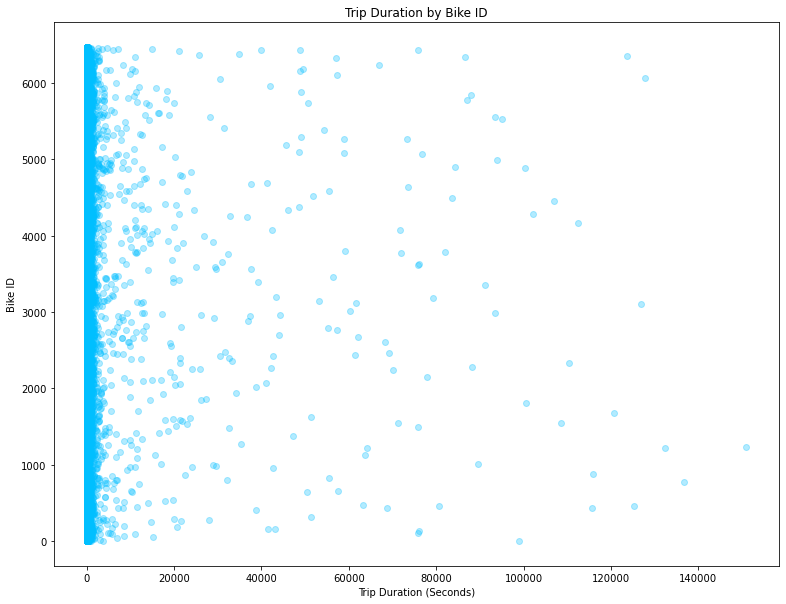

In [26]:
# Plot Trip Duration by Bike ID
plt.figure(figsize=(13,10))
plt.scatter(divvy_df['time difference'], divvy_df['bikeid'], color="deepskyblue", alpha = .3, edgecolors='deepskyblue')
plt.title("Trip Duration by Bike ID")
plt.xlabel("Trip Duration (Seconds)")
plt.ylabel("Bike ID")
plt.show()

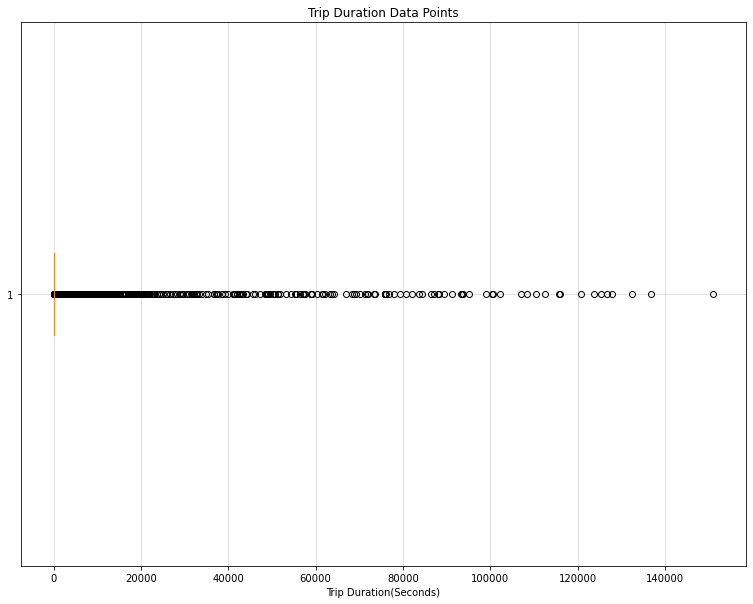

In [30]:
# Plot Trip Duration Data Points
plt.figure(figsize=(13,10))
plt.boxplot(divvy_df['time difference'], vert=False)
plt.title("Trip Duration Data Points")
plt.xlabel("Trip Duration(Seconds)")
plt.grid(True, alpha=.5)
plt.show()

In [31]:
# Find 20 most used bike IDs
popular_bikes = divvy_df['bikeid'].value_counts().head(20)
popular_bikes

5724    535
3115    532
5344    531
3088    528
717     521
5634    520
6079    519
4638    518
320     517
3770    516
6425    515
6198    514
4877    513
522     509
749     507
5501    506
3333    506
682     505
4781    505
4020    505
Name: bikeid, dtype: int64

# ! Why have bike ID mean?

In [32]:
# Find mean of most used bike IDs
popular_bikes.mean()

516.1

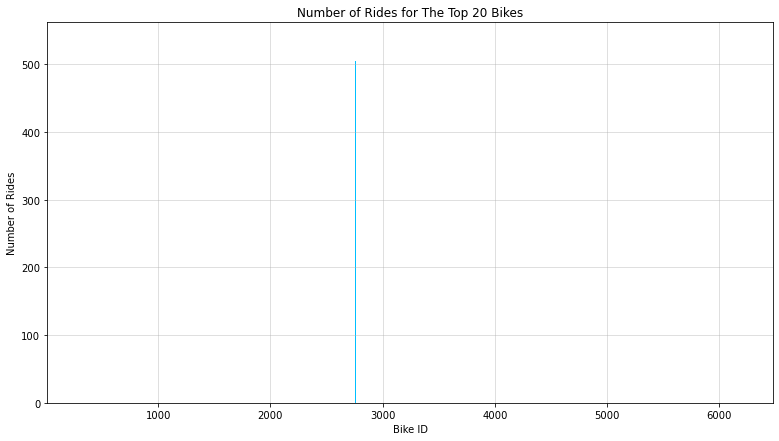

In [33]:
# Plot most used bikes in bar chart
plt.figure(figsize=(13,7))
plt.bar(divvy_df['bikeid'].head(20), popular_bikes, color='deepskyblue')
plt.title("Number of Rides for The Top 20 Bikes")
plt.xlabel("Bike ID")
plt.ylabel("Number of Rides")
plt.grid(True, alpha=.5)

In [34]:
# Find mean, median, and mode of time difference
divvy_df['time difference'].mean()
divvy_df['time difference'].median()
divvy_df['time difference'].mode()

0    5.716667
dtype: float64

In [35]:
# Convert bike ID to string
divvy_df['bikeid'] = divvy_df['bikeid'].astype(str)
divvy_df['bikeid'].dtypes

dtype('O')

### Popular Stations: Top 25

In [36]:
# Identify the most popular starting stations
top_routes = divvy_df['from_station_name'].value_counts()
total_trips_df = pd.DataFrame({
    'total trips': top_routes
})

# Reduce the results to any stations with trip greater than or equal to 10,000
total_trips_reduced = total_trips_df.loc[total_trips_df['total trips'] >= 10000]
total_trips_reduced

,total trips
Streeter Dr & Grand Ave,39726
Lake Shore Dr & Monroe St,26309
Lake Shore Dr & North Blvd,21845
Michigan Ave & Oak St,20300
Canal St & Adams St,20176
Clinton St & Madison St,19019
Theater on the Lake,18491
Millennium Park,18337
Clinton St & Washington Blvd,16854
Michigan Ave & Washington St,16073


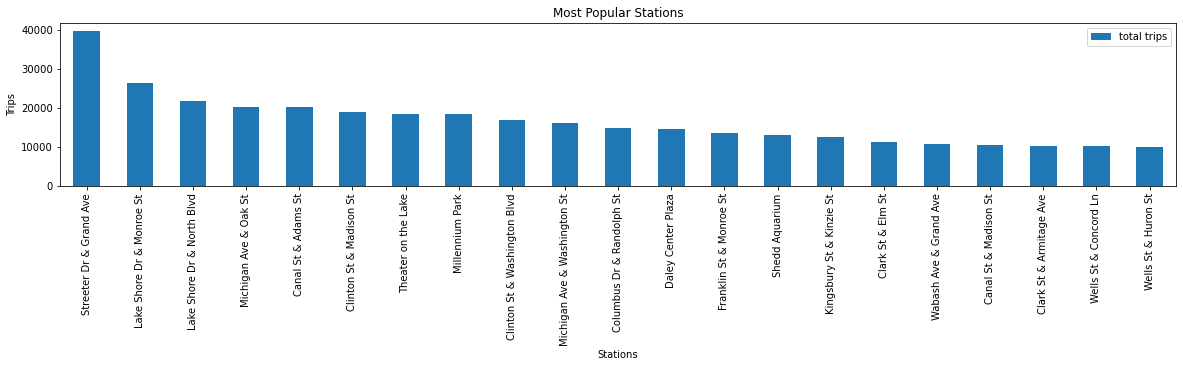

<Figure size 432x288 with 0 Axes>

In [37]:
# Display a bar chart of the 25 most popular stations
total_trips_reduced.plot(kind='bar', figsize=(20,3))
plt.title('Most Popular Stations')
plt.xlabel('Stations')
plt.ylabel('Trips')
plt.show()
plt.tight_layout()

### Popular Routes: Top 25

In [41]:
# Create a dataframe shows the most popular ending station for popular starting stations
divvy_rides = {'from_station': divvy_df['from_station_name'],
               'to_station': divvy_df['to_station_name']
              }

divvy_rides_df = pd.DataFrame(divvy_rides, columns=['from_station', 'to_station'])
dup_to_from = divvy_rides_df.pivot_table(index=['from_station', 'to_station'], aggfunc='size')

# Reconfigure dataframe to display data side by side
dup_to_from.columns = dup_to_from.droplevel(0)
dup_to_from.columns.name = None
dup_to_from_II = dup_to_from.reset_index()

# Rename dataframe columns
to_from_III = dup_to_from_II.rename(columns={'from_station': 'from_station', 'to_station':'to_station', 0:'rides_taken'})
to_from_III

,from_station,to_station,rides_taken
0,2112 W Peterson Ave,2112 W Peterson Ave,6
1,2112 W Peterson Ave,Broadway & Argyle St,2
2,2112 W Peterson Ave,Broadway & Barry Ave,2
3,2112 W Peterson Ave,Broadway & Berwyn Ave,3
4,2112 W Peterson Ave,Broadway & Granville Ave,6
...,...,...,...
101526,Yates Blvd & 75th St,South Shore Dr & 71st St,4
101527,Yates Blvd & 75th St,South Shore Dr & 74th St,3
101528,Yates Blvd & 75th St,Stony Island Ave & 82nd St,1
101529,Yates Blvd & 75th St,Woodlawn Ave & Lake Park Ave,1


In [44]:
# Remove rows where start and end station were identical
to_from_removed_dups = to_from_III[to_from_III['from_station'] != to_from_III['to_station']]

# Sort dataframe of start/end stations, sort, and identify 25 most popular routes
most_pop_rides = to_from_removed_dups.loc[to_from_removed_dups.groupby('from_station')['rides_taken'].idxmax()]
most_popular_routes = most_pop_rides.sort_values(ascending=False, by='rides_taken').reset_index(drop=True)
most_popular_reduced = most_popular_routes[0:25]
most_popular_reduced

,from_station,to_station,rides_taken
0,Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,5055
1,Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,2132
2,Shedd Aquarium,Streeter Dr & Grand Ave,1813
3,Millennium Park,Streeter Dr & Grand Ave,1775
4,Lake Shore Dr & North Blvd,Streeter Dr & Grand Ave,1703
5,Theater on the Lake,Streeter Dr & Grand Ave,1559
6,Dusable Harbor,Streeter Dr & Grand Ave,1414
7,Canal St & Adams St,Michigan Ave & Washington St,1355
8,Michigan Ave & Oak St,Streeter Dr & Grand Ave,1334
9,Michigan Ave & Washington St,Clinton St & Washington Blvd,1056


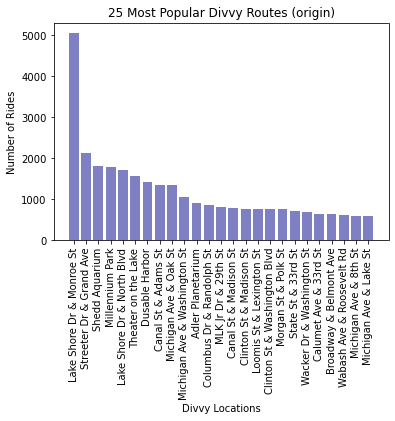

<Figure size 432x288 with 0 Axes>

In [45]:
# Create a bar chart of the 25 most popular routes
plt.bar(most_popular_reduced['from_station'], most_popular_reduced['rides_taken'], color='darkblue', alpha=.5, align='center')
plt.xticks(most_popular_reduced['from_station'], rotation='vertical')
plt.title('25 Most Popular Divvy Routes (origin)')
plt.xlabel('Divvy Locations')
plt.ylabel('Number of Rides')
plt.show()
plt.tight_layout()

### Comparing Subscribers & Customers

In [46]:
# Groupby usertype for ridership breakdown
usertype_df = divvy_df.groupby('usertype')
usertype_df.count()

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,age,Age Group
usertype,,,,,,,,,,,,,,,,
Customer,491694,491694,491694,491694,491694,491694,491694,491694,491694,491694,491694,491694,214116,216619,216619,216591
Subscriber,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1149024,1139252,1146005,1146005,1145657


In [47]:
# Find amount ot Subscribers and Customers
divvy_df['usertype'].value_counts()

Subscriber    1149024
Customer       491694
Name: usertype, dtype: int64

In [48]:
# Find Usertype Percentage

# Count number of trips for each usertype
count_number_usertype = divvy_df['trip_id'].nunique()

# Count number of each usertype
usertype_number = usertype_df['trip_id'].nunique()

# Percentage Usertype Calculation
percent_usertype =  usertype_number / count_number_usertype * 100

# Display usertype demographics
usertype_demographics_df = pd.DataFrame({'Total Count':usertype_number,
                                       'Percentage':percent_usertype})
usertype_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
usertype,,
Subscriber,1149024,70.031779
Customer,491694,29.968221


### Use by Gender

In [49]:
# Find amount of Male and Female riders
divvy_df['gender'].value_counts()

Male      957353
Female    396015
Name: gender, dtype: int64

In [50]:
# Group by gender
usertype_gender_df = divvy_df.groupby('gender')

# Count number of trips for each gender
count_number_gender = divvy_df['trip_id'].nunique()

# Count number of each gender
gender_type_number = usertype_gender_df['trip_id'].nunique()

# Calculate percentage for gender
percent_gender =  gender_type_number / count_number_gender * 100

# Display gender demographics
gender_demographics_df = pd.DataFrame({'Total Count':gender_type_number,
                                       'Percentage':percent_gender})
gender_demographics_df.sort_values('Total Count', ascending = False)

,Total Count,Percentage
gender,,
Male,957353,58.349637
Female,396015,24.136689


Text(0.5, 1.0, 'Total Divvy Riders based on Gender')

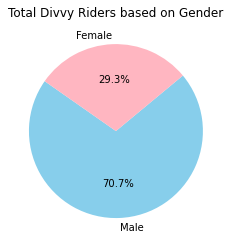

In [51]:
# Total Divvy Riders based on Gender- PIE CHART
gender_data = divvy_df['gender'].value_counts()
gender_labels = ['Male','Female']
colours = ['skyblue', 'lightpink']
plt.pie(gender_data, labels= gender_labels, colors=colours, autopct="%1.1f%%", startangle=145)
plt.title("Total Divvy Riders based on Gender")

In [52]:
# Find breakdown of each gender for each usertype
usertype_gender_df['usertype'].value_counts()

gender  usertype  
Female  Subscriber    313303
        Customer       82712
Male    Subscriber    825949
        Customer      131404
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Total Divvy Riders based on Gender and Usertype')

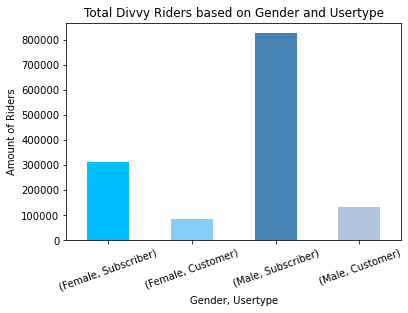

In [53]:
# Total Divvy Riders based on Gender and Usertype- Bar Graph
split_gender_data = usertype_gender_df['usertype'].value_counts()
blue_colors = ["deepskyblue", "lightskyblue", "steelblue", "lightsteelblue"]
gender_chart = split_gender_data.plot(kind = 'bar', color = blue_colors, rot = 20)
gender_chart.set_ylabel("Amount of Riders")
gender_chart.set_xlabel("Gender, Usertype")
gender_chart.set_title("Total Divvy Riders based on Gender and Usertype")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Customers Only')

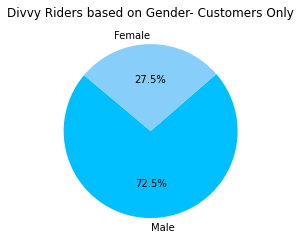

In [54]:
# Divvy Riders based on Gender- Customers Only
sizes = [825949,313303]
skyblue_colors = ["deepskyblue", "lightskyblue"]
plt.pie(sizes, labels= gender_labels, colors=skyblue_colors, autopct="%1.1f%%", startangle=140)
plt.title("Divvy Riders based on Gender- Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Gender- Subscribers Only')

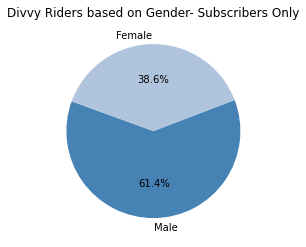

In [55]:
# Divvy Riders based on Gender- Subscribers Only
sizes = [131404,82712]
steel_colors = ["steelblue", "lightsteelblue"]
plt.pie(sizes, labels= gender_labels, colors=steel_colors, autopct="%1.1f%%", startangle=160)
plt.title("Divvy Riders based on Gender- Subscribers Only")

### Use by Age Group

In [56]:
# Count number of trips for each age group
count_number_age = divvy_df['trip_id'].nunique()

# Count number in each age group and display
usertype_age_df = divvy_df.groupby('Age Group')
age_type_number = usertype_age_df['trip_id'].nunique()
usertype_age_df.count()

,trip_id,bikeid,start_date,start_time,time difference,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
Age Group,,,,,,,,,,,,,,,,
11-19,24439,24439,24439,24439,24439,24439,24439,24439,24439,24439,24439,24439,24439,24148,24439,24439
20-29,637735,637735,637735,637735,637735,637735,637735,637735,637735,637735,637735,637735,637735,633811,637735,637735
30-39,405750,405750,405750,405750,405750,405750,405750,405750,405750,405750,405750,405750,405750,402889,405750,405750
40-49,152741,152741,152741,152741,152741,152741,152741,152741,152741,152741,152741,152741,152741,151754,152741,152741
50-59,107283,107283,107283,107283,107283,107283,107283,107283,107283,107283,107283,107283,107283,106465,107283,107283
60-69,31557,31557,31557,31557,31557,31557,31557,31557,31557,31557,31557,31557,31557,31272,31557,31557
70-79,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2710,2656,2710,2710
80-89,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [57]:
# Average Trip Duration
average_duration = usertype_age_df['tripduration'].count().mean()
average_duration

170281.0

Text(0.5, 1.0, 'Sum Trip Duration by Age Groups')

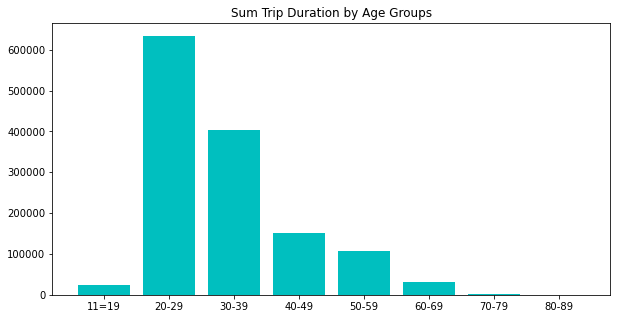

In [58]:
# Plot trip duration by age group
ages = ['11=19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
tripduration = [24148, 633811, 402889, 151754, 106465, 31272, 2656, 33]
plt.figure(figsize=(10,5))
plt.bar(ages, tripduration, color='c')
plt.title("Sum Trip Duration by Age Groups")

In [59]:
# Calculate percentage for age
percent_age =  age_type_number / count_number_age * 100

# Make df of age demographics
age_demographics_df = pd.DataFrame({'Total Count':age_type_number,
                                       'Percentage of Age':percent_age})
age_demographics_df.sort_values('Age Group', ascending = True)

,Total Count,Percentage of Age
Age Group,,
11-19,24439,1.489531
20-29,637735,38.869263
30-39,405750,24.730027
40-49,152741,9.309400
50-59,107283,6.538784
60-69,31557,1.923365
70-79,2710,0.165172
80-89,33,0.002011


Text(0.5, 1.0, 'Total Divvy Riders based on Age')

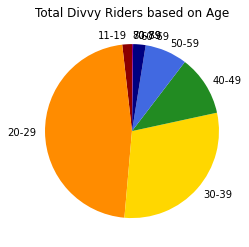

In [60]:
# Total Divvy Riders based on Age- Pie Chart
rainbow_colors = ["darkred", "darkorange", "gold", "forestgreen", "royalblue", "navy", "darkmagenta", "hotpink"]
plt.pie(percent_age, labels= group_names, colors=rainbow_colors, startangle=90)
#autopct="%1.1f%%"
plt.title("Total Divvy Riders based on Age")

Text(0.5, 1.0, 'Total Divvy Riders Based on Age')

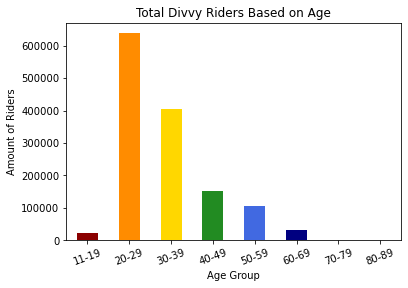

In [61]:
# Total Divvy Riders based on Age- Bar Chart
age_chart = age_type_number.plot(kind = 'bar', color = rainbow_colors, rot = 20)
age_chart.set_ylabel("Amount of Riders")
age_chart.set_xlabel("Age Group")
age_chart.set_title("Total Divvy Riders Based on Age")

Text(0.5, 1.0, 'Percentage Divvy Riders Based on Age')

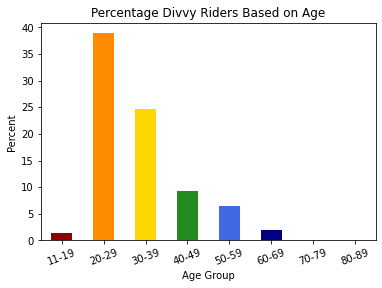

In [62]:
# Percentage Divvy Riders based on Age- Bar Chart
percent_chart = percent_age.plot(kind = 'bar', color = rainbow_colors, rot = 20)
percent_chart.set_ylabel("Percent")
percent_chart.set_xlabel("Age Group")
percent_chart.set_title("Percentage Divvy Riders Based on Age")

In [63]:
# Age seperated by usertype
usertype_age_df['usertype'].value_counts()

Age Group  usertype  
11-19      Customer       12232
           Subscriber     12207
20-29      Subscriber    515465
           Customer      122270
30-39      Subscriber    357309
           Customer       48441
40-49      Subscriber    133147
           Customer       19594
50-59      Subscriber     95445
           Customer       11838
60-69      Subscriber     29468
           Customer        2089
70-79      Subscriber      2586
           Customer         124
80-89      Subscriber        30
           Customer           3
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Divvy Riders based on Age, Customers Only')

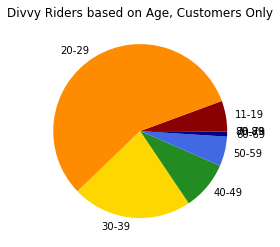

In [64]:
# Divvy Riders based on Age, Customers Only- PIE CHART
customer_age_totals = [12055,121091,47608,19395,11752,2071,121,3]
plt.pie(customer_age_totals, labels= group_names, colors=rainbow_colors)
#autopct="%1.1f%%"
#startangle=90
plt.title("Divvy Riders based on Age, Customers Only")

Text(0.5, 1.0, 'Divvy Riders based on Age, Subscribers Only')

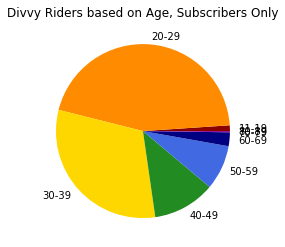

In [65]:
# Divvy Riders based on Age, Subscribers Only- PIE CHART
subscriber_age_totals = [12093,512720,355281,132359,94713,29201,2535,30]
plt.pie(subscriber_age_totals, labels= group_names, colors = rainbow_colors)
#startangle=90
#autopct="%1.1f%%",
plt.title("Divvy Riders based on Age, Subscribers Only")

Text(0, 0.5, 'Amount of Riders')

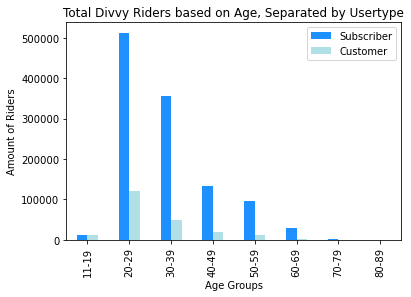

In [66]:
# Total Divvy Riders based on Age, Separated by Usertype- Histogram
plotdata = pd.DataFrame({
    "Subscriber":subscriber_age_totals,
    "Customer":customer_age_totals
    }, 
    index= group_names
    )
plotdata.plot(kind="bar", color = ['dodgerblue','powderblue'])
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

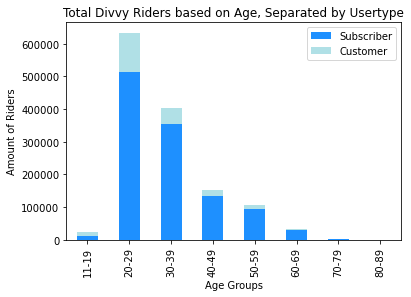

In [67]:
# Total Divvy Riders based on Age, Separated by Usertype- Stacked Histogram
plotdata[["Subscriber", "Customer"]].plot(kind="bar", color=['dodgerblue','powderblue'], stacked=True)
plt.title("Total Divvy Riders based on Age, Separated by Usertype")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

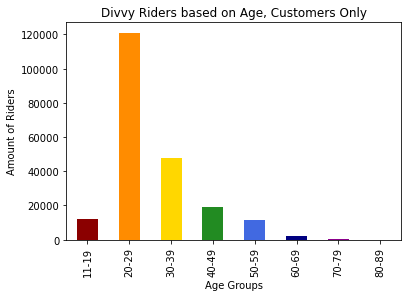

In [68]:
# Divvy Riders based on Age, Customers Only- BAR CHART
plotdata['Customer'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Customers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")

Text(0, 0.5, 'Amount of Riders')

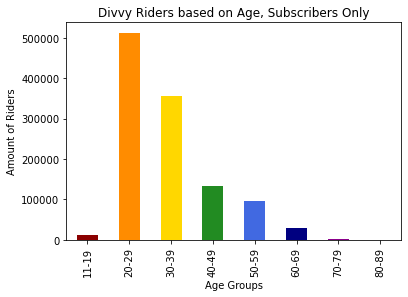

In [69]:
# Divvy Riders based on Age, Subscribers Only- BAR CHART
plotdata['Subscriber'].plot(kind="bar", color=rainbow_colors, title="test")
plt.title("Divvy Riders based on Age, Subscribers Only")
plt.xlabel("Age Groups")
plt.ylabel("Amount of Riders")